In [ ]:
# Imports

# Notes

- definitely also leave this website somewhere in the notebook https://playground.tensorflow.org/
- todo remove the loss plots and show them later
- breakup the code parts
- maybe add torchinfo
- maybe we can animate the weights like this https://ml-visualized.com/chapter4/neural_network_weights
- i had a bit of trouble animating gradient descent with this https://aero-learn.imperial.ac.uk/vis/Machine%20Learning/gradient_descent_3d.html, leave it for now
- todo improve gradient descent plots
- go over the code to split it up in more feasible parts
- I didn't introduce early stopping now, I think it would make sense to maybe talk about regularization in neural nets (dropout early stopping etc.) seperately but aswell, maybe we can combine it with hyperparameter tuning, because there i have just done 1 plot for different learning rates

# Table of Contents

<br><br>
# **Hands-On: Deep Learning Fundamentals**

## Why This Matters for Healthcare

Neural networks are revolutionizing medical practice:
- **Medical imaging**: Detecting cancer in radiology scans with superhuman accuracy
- **Drug discovery**: Accelerating the development of new treatments
- **Clinical decision support**: Predicting patient outcomes and treatment responses
- **Electronic health records**: Extracting insights from complex patient data

**This session will demystify the technology** behind these breakthroughs and show you how neural networks actually work.

## Learning Goals

By the end of this session, you will:

### **Understand How Neural Networks Think**
- Grasp the core concept: how simple mathematical functions combine to recognize complex patterns
- See why networks can learn any relationship in your data (Universal Approximation Theorem)

### TODO add more learning goals here

---

**No advanced math required** – we focus on intuition and practical understanding!

## What is a Neural Network?

A **neural network** is a computational model inspired by how biological neurons process information. At its core, it's a collection of interconnected nodes (neurons) that:

1. **Receive inputs** (like features from data)
2. **Apply weights** to these inputs (learned parameters)
3. **Add a bias term** (learned offset)
4. **Pass through an activation function** (introduces non-linearity)
5. **Produce an output** that feeds into the next layer

**Key components:**
- **Weights**: Determine the strength of connections between neurons
- **Biases**: Allow neurons to activate even when inputs are zero
- **Activation functions**: Non-linear functions (like ReLU, sigmoid, tanh) that enable networks to learn complex patterns

<img src="imgs/relu_nn.webp" alt="Neural Network Diagram" width="500"/>

## Why Neural Networks Are So Powerful

Here's the remarkable thing: **neural networks can learn to recognize ANY pattern** in your data, no matter how complex. This is backed by a fundamental mathematical principle:

> **The Universal Approximation Theorem**: Any continuous relationship can be learned by a neural network with enough neurons.

Let's see the magic in action by building complex functions from simple building blocks.

## Building Complex Patterns from Simple Parts

We'll demonstrate this using **ReLU (Rectified Linear Unit)** functions - the most common building block in modern neural networks.

**ReLU function**: `ReLU(x) = max(0, x)` - outputs the input if positive, zero otherwise.

The magic happens when we:
1. **Shift** ReLU functions to different positions
2. **Scale** them with different weights  
3. **Combine** multiple ReLUs together

Let's see how these simple "on/off" functions can create surprisingly complex patterns:

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

def interactive_relu_demo():
    """Interactive demonstration of how ReLU combinations create different functions"""
    
    # Create x-axis
    x = torch.linspace(-2, 2, 1000)
    
    def plot_relu_combination(weight1=1.0, bias1=0.0, weight2=-0.5, bias2=0.5, weight3=0.3, bias3=-1.0):
        """Plot combination of 3 ReLU functions with adjustable parameters"""
        
        # Compute individual ReLU functions
        relu1 = weight1 * torch.relu(x + bias1)
        relu2 = weight2 * torch.relu(x + bias2)  
        relu3 = weight3 * torch.relu(x + bias3)
        
        # Combine all ReLUs
        combined = relu1 + relu2 + relu3
        
        # Create the plot
        plt.figure(figsize=(14, 8))
        
        # Plot individual ReLUs
        plt.subplot(1, 2, 1)
        plt.plot(x, relu1, 'r-', linewidth=2, label=f'ReLU1: {weight1:.1f}*ReLU(x + {bias1:.1f})')
        plt.plot(x, relu2, 'g-', linewidth=2, label=f'ReLU2: {weight2:.1f}*ReLU(x + {bias2:.1f})')
        plt.plot(x, relu3, 'b-', linewidth=2, label=f'ReLU3: {weight3:.1f}*ReLU(x + {bias3:.1f})')
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        plt.title('Individual ReLU Functions')
        plt.xlabel('x')
        plt.ylabel('ReLU(x)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(-3, 3)
        
        # Plot combined function
        plt.subplot(1, 2, 2)
        plt.plot(x, combined, 'purple', linewidth=3, label='Combined Function')
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        plt.title('Combined ReLU Function')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(-3, 3)
        
        plt.tight_layout()
        plt.show()
        
    # Create interactive sliders
    weight_layout = Layout(width='300px')
    bias_layout = Layout(width='300px')
    
    interact(plot_relu_combination,
             weight1=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 1:', layout=weight_layout),
             bias1=FloatSlider(min=-2, max=2, step=0.1, value=0.0, description='Bias 1:', layout=bias_layout),
             weight2=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 2:', layout=weight_layout),
             bias2=FloatSlider(min=-2, max=2, step=0.1, value=0.5, description='Bias 2:', layout=bias_layout),
             weight3=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 3:', layout=weight_layout),
             bias3=FloatSlider(min=-2, max=2, step=0.1, value=-0.5, description='Bias 3:', layout=bias_layout))

interactive_relu_demo()

interactive(children=(FloatSlider(value=1.0, description='Weight 1:', layout=Layout(width='300px'), max=2.0, m…

You can see how just changing the **weight** (slope) and **bias** (shift) parameters creates completely different function shapes. This is the key insight:

- **Weight** controls how steep the ReLU ramp is
- **Bias** controls where the ReLU "turns on" (shifts the corner left/right)
- **Combining multiple ReLUs** with different weights and biases lets us build complex, piecewise-linear functions

Now you understand the building blocks! But can we really approximate **any** function? Let's put this to the test with a challenging target: **the sine function**.

The sine function is smooth and curved - quite different from the sharp, linear segments of ReLU functions. Yet the Universal Approximation Theorem tells us we can get arbitrarily close using enough ReLUs.

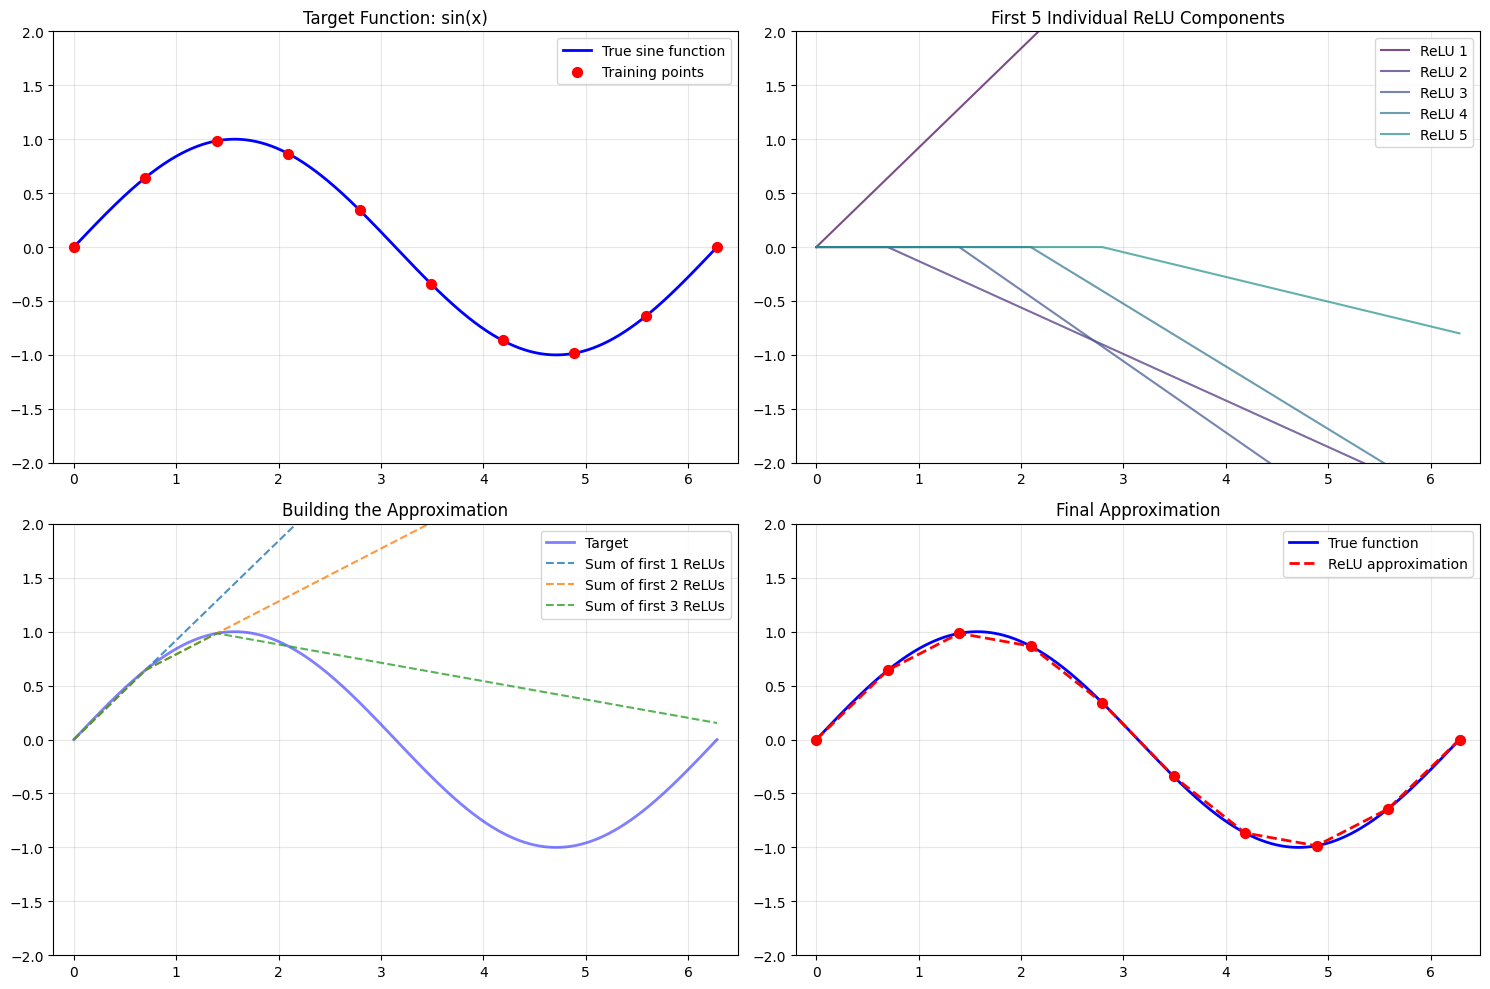

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def approximate_function(x_train, y_train):
    """
    Approximate any function using combination of ReLU activations
    
    Args:
        x_train: Training x points
        y_train: Training y points (target function values)
    
    Returns:
        y_hat: Approximated function values
        relu_acts: Individual ReLU activations
        x: Dense x-axis for plotting
    """
    
    # Number of ReLUs needed
    n_relus = x_train.shape[0] - 1
    
    # Dense x-axis for smooth plotting
    x = torch.linspace(torch.min(x_train), torch.max(x_train), 1000)
    
    ## COMPUTE RELU ACTIVATIONS
    # Set bias terms to "activate" ReLUs at training points
    b = -x_train[:-1]
    
    # Compute ReLU activations: ReLU(x + bias)
    relu_acts = torch.zeros((n_relus, x.shape[0]))
    for i_relu in range(n_relus):
        relu_acts[i_relu, :] = torch.relu(x + b[i_relu])
    
    ## COMBINE RELU ACTIVATIONS
    # Calculate weights to match target function slopes
    combination_weights = torch.zeros((n_relus,))
    
    prev_slope = 0
    for i in range(n_relus):
        delta_x = x_train[i+1] - x_train[i]
        slope = (y_train[i+1] - y_train[i]) / delta_x
        combination_weights[i] = slope - prev_slope
        prev_slope = slope
    
    # Final approximation: weighted sum of ReLUs
    y_hat = combination_weights @ relu_acts
    
    return y_hat, relu_acts, x, combination_weights

def plot_function_approximation(x, relu_acts, y_hat, combination_weights):
    """Plot the function approximation process"""
    
    # Original function for comparison
    y_true = torch.sin(x)

    # Set consistent axis limits for all plots
    x_lim = [float(torch.min(x))-0.2, float(torch.max(x))+0.2]
    y_lim = [-2, 2]  # Accommodate both sine function and individual ReLUs
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Original function
    axes[0,0].plot(x, y_true, 'b-', linewidth=2, label='True sine function')
    axes[0,0].scatter(x_train.flatten(), y_train.flatten(), color='red', s=50, zorder=5, label='Training points')
    axes[0,0].set_title('Target Function: sin(x)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Individual ReLU functions
    axes[0,1].set_title('First 5 Individual ReLU Components')
    colors = plt.cm.viridis(np.linspace(0, 1, relu_acts.shape[0]))
    for i in range(min(5, relu_acts.shape[0])):  # Show first 5 ReLUs
        axes[0,1].plot(x, combination_weights[i] * relu_acts[i], color=colors[i], alpha=0.7, label=f'ReLU {i+1}')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_xlim(x_lim)
    axes[0,1].set_ylim(y_lim)
    axes[0,0].set_xlim(x_lim)
    axes[0,0].set_ylim(y_lim)
    
    # Plot 3: Cumulative approximation
    axes[1,0].set_title('Building the Approximation')
    axes[1,0].plot(x, y_true, 'b-', linewidth=2, alpha=0.5, label='Target')
    
    # Show cumulative sum of ReLUs
    cumulative = torch.zeros_like(x)
    for i in range(min(3, relu_acts.shape[0])):
        cumulative += combination_weights[i] * relu_acts[i]
        axes[1,0].plot(x, cumulative, '--', alpha=0.8, label=f'Sum of first {i+1} ReLUs')
    
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_xlim(x_lim)
    axes[1,0].set_ylim(y_lim)
    
    # Plot 4: Final approximation
    axes[1,1].plot(x, y_true, 'b-', linewidth=2, label='True function')
    axes[1,1].plot(x, y_hat, 'r--', linewidth=2, label='ReLU approximation')
    axes[1,1].scatter(x_train.flatten(), y_train.flatten(), color='red', s=50, zorder=5)
    axes[1,1].set_title('Final Approximation')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_xlim(x_lim)
    axes[1,1].set_ylim(y_lim)
    
    plt.tight_layout()
    plt.show()

# Generate training data from sine function
N_train = 10
x_train = torch.linspace(0, 2*np.pi, N_train).view(-1, 1)
y_train = torch.sin(x_train)

# Approximate the function
y_hat, relu_acts, x, combination_weights = approximate_function(x_train, y_train)

# Visualize the approximation process
plot_function_approximation(x, relu_acts, y_hat, combination_weights)

Our ReLU approximation captures the sine wave's shape quite well, even with just 9 ReLU functions (from 10 training points). 

- The approximation follows the general sine curve structure  
- It perfectly matches at all training points (red dots)
- The piecewise-linear nature creates small "corners" but the overall shape is preserved

## Building MLPs with PyTorch

**What we just accomplished**: We manually engineered a function approximator using mathematical formulas and ReLU building blocks.

**What we'll do now**: Build the same thing using **PyTorch**

**Multilayer Perceptron (MLP)** is the formal name for the type of neural network we've been exploring:
- **Input layer**: Receives data
- **Hidden layer(s)**: Transform data using weights, biases, and activation functions (like ReLU)
- **Output layer**: Produces final predictions

MLPs are also called **feedforward neural networks** or **fully connected networks** - they're the foundation that more complex architectures (some we will explore later) build upon.

Let's start with the simplest possible example - a simple MLP that learns to approximate our sine function.

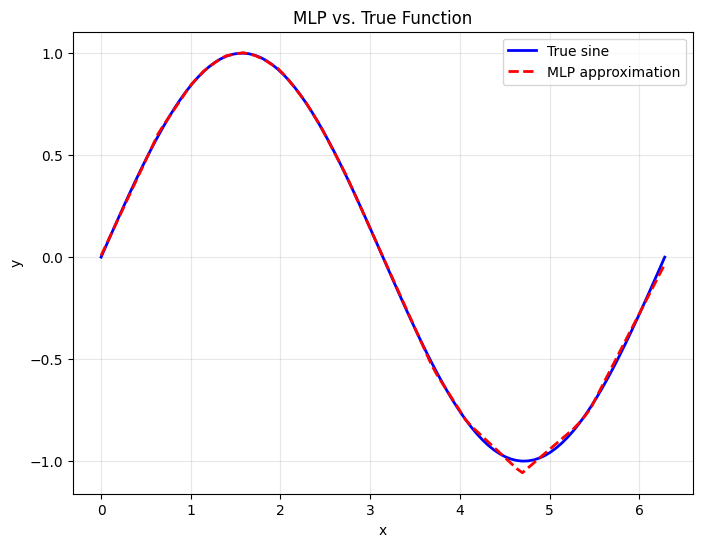

Final loss: 0.000138


In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),   # Input to hidden
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, hidden_size), # Hidden to hidden  
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, output_size)  # Hidden to output
        )
    
    def forward(self, x):
        return self.layers(x)

def fit_model(model, x_train, y_train, epochs=2000, lr=0.01, type='regression'):
    """Train the neural network - we'll explore this process in detail later!
    
    Args:
        type: 'classification' uses CrossEntropyLoss, 'regression' uses MSELoss
    """
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Choose loss function based on problem type
    if type == 'classification':
        criterion = nn.CrossEntropyLoss()
    else:
        criterion = nn.MSELoss()
    
    losses = []
    for epoch in range(epochs):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    
    return losses

# Create a more powerful network that has 20 hidden neurons
mlp = MLP(input_size=1, hidden_size=20, output_size=1)


In [ ]:

# Generate training data from sine function
N_train = 100
x_train = torch.linspace(0, 2*np.pi, N_train).view(-1, 1)
y_train = torch.sin(x_train)

# Train the model (we'll dive into how this works later!)
losses = fit_model(mlp, x_train, y_train)


In [ ]:

# Compare results
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'b-', linewidth=2, label='True sine')
plt.plot(x_train, mlp(x_train).detach(), 'r--', linewidth=2, label='MLP approximation')
plt.title('MLP vs. True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final loss: {losses[-1]:.6f}")

## From Function Approximation to Classification

We just built neural networks that learn continuous functions. But MLPs can do much more than approximate sine waves.

Let's tackle a more challenging example. **Can a neural network learn to distinguish between points in an inner circle vs. an outer ring?**

This demonstrates how neural networks transform simple 2D coordinates into complex decision boundaries.

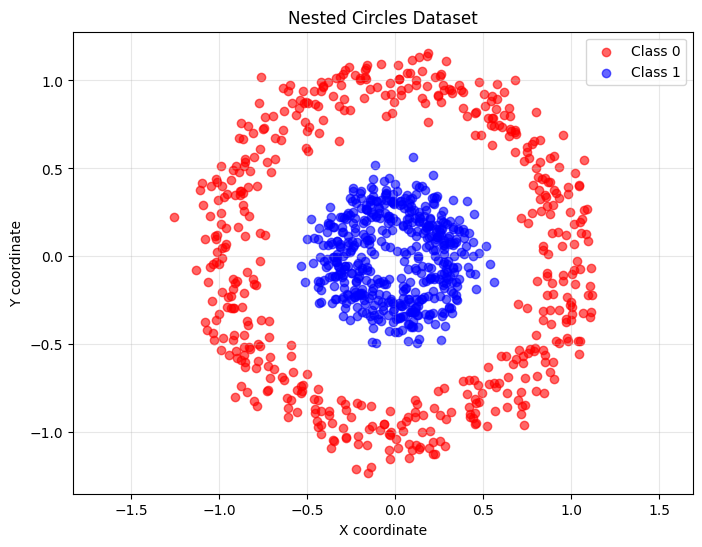

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
import seaborn as sns
from sklearn.datasets import make_circles

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

def create_nested_circles_data(n_samples=1000, noise=0.1, random_state=42):
    """Create nested circles dataset using sklearn"""
    X, y = make_circles(n_samples=n_samples, 
                        noise=noise, 
                        factor=0.3,  # ratio of inner to outer circle
                        random_state=random_state)
    
    return torch.FloatTensor(X), torch.LongTensor(y)

# Create dataset
X_train, y_train = create_nested_circles_data(1000)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    mask = y_train == i
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[i], alpha=0.6, 
                label=f'Class {i}')
plt.title('Nested Circles Dataset')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()


Now let's define a slightly more complex MLP with **two hidden layers** to tackle this circular classification problem:

**Key differences from our sine function MLP:**
- **Input size**: 2 (x and y coordinates instead of just x)
- **Output size**: 2 (probability for each class: inner circle vs outer ring) (TODO Maybe adjust this to 1 output with sigmoid function)
- **Two hidden layers**: More capacity to learn complex patterns

**Custom functionality**: We've added a special `get_representations()` function to our MLP that returns the intermediate representations learned by each layer. This allows us to visualize how the network transforms the data step-by-step - we'll use this to see how patterns emerge!

In [66]:
class CircleClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=10, num_classes=2):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Store intermediate representations
        self.input_repr = x
        
        # First hidden layer
        h1 = self.relu(self.layer1(x))
        self.hidden1_repr = h1
        
        # Second hidden layer  
        h2 = self.relu(self.layer2(h1))
        self.hidden2_repr = h2
        
        # Output layer
        output = self.layer3(h2)
        
        return output
    
    def get_representations(self, x):
        """Get intermediate representations for visualization"""
        with torch.no_grad():
            output = self.forward(x)
            return {
                'input': self.input_repr.numpy(),
                'hidden1': self.hidden1_repr.numpy(), 
                'hidden2': self.hidden2_repr.numpy(),
                'output': output.numpy() 
            }

# Create and train the model
model = CircleClassifier(hidden_size=20)


In [67]:
# Train the model
losses = fit_model(model, X_train, y_train, epochs=1000, type='classification')

In [ ]:
def visualize_decision_boundary(model, X, y):
    """Visualize the decision boundary learned by the model"""
    # Create a mesh
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        outputs = model(mesh_points)
        predictions = torch.softmax(outputs, dim=1)[:, 1]  # Probability of class 1
    
    predictions = predictions.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, predictions, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Probability of Class 1')
    
    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], 
                    c=colors[i], alpha=0.7, 
                    label=f'Class {i}', edgecolors='black', linewidth=0.5)
    
    plt.title('Neural Network Decision Boundary')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.axis('equal')
    plt.show()

def visualize_layer_transformations(model, X, y, n_samples=500):
    """Visualize how data transforms through network layers using MDS"""
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    # Sample subset for clarity
    indices = np.random.choice(len(X), n_samples, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    # Get representations from each layer
    representations = model.get_representations(X_sample)
    
    # Set up the plot
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    layer_names = ['Input Space', 'Hidden Layer 1', 'Hidden Layer 2', 'Output Layer']
    layer_keys = ['input', 'hidden1', 'hidden2', 'output']
    
    colors = ['red', 'blue']
    
    for i, (layer_name, layer_key) in enumerate(zip(layer_names, layer_keys)):
        data = representations[layer_key]
        
        # If more than 2 dimensions, use MDS to reduce to 2D
        if data.shape[1] > 2:
            mds = MDS(n_components=2, random_state=42)
            data_2d = mds.fit_transform(data)
        else:
            data_2d = data
            
        # Plot each class
        for class_idx in range(2):
            mask = y_sample == class_idx
            axes[i].scatter(data_2d[mask, 0], data_2d[mask, 1], 
                           c=colors[class_idx], alpha=0.6, 
                           label=f'Class {class_idx}', s=20)
        
        axes[i].set_title(f'{layer_name}\n({data.shape[1]}D → 2D via MDS)' if data.shape[1] > 2 
                         else f'{layer_name}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Make axes equal for input space
        if i == 0:
            axes[i].axis('equal')
    
    plt.suptitle('How Neural Networks Transform Data Through Layers', fontsize=16)
    plt.tight_layout()
    plt.show()

After training our model, let's investigate what it actually learned. We can visualize the **decision boundary** by coloring the entire space based on which class the model predicts is more probable at each point.

**Red regions**: Model predicts "outer circle" (Class 0)  
**Blue regions**: Model predicts "inner ring" (Class 1)

This will reveal whether our MLP successfully learned the circular pattern!

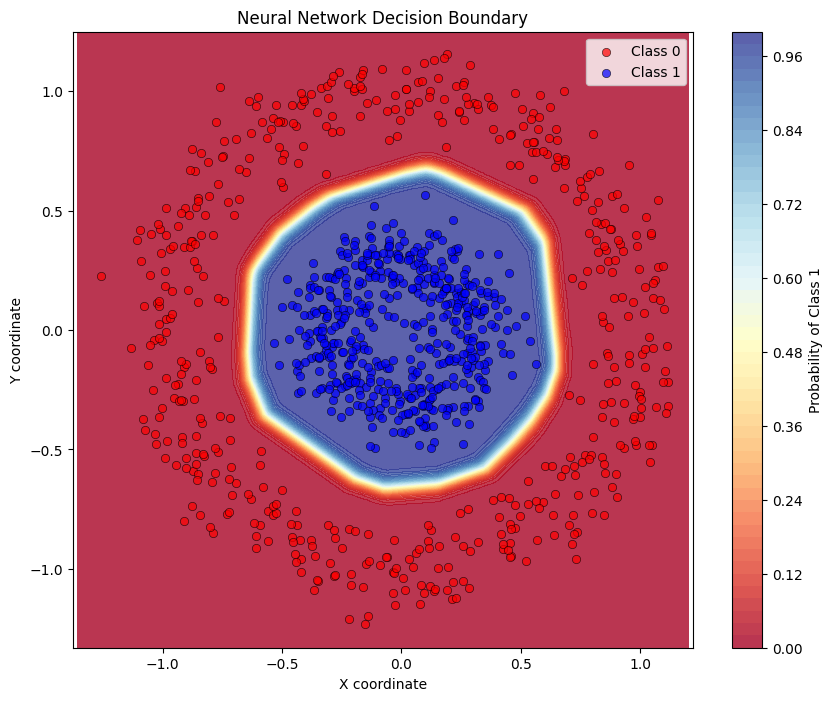

In [69]:
# Visualize results
visualize_decision_boundary(model, X_train.numpy(), y_train.numpy())

The neural network successfully discovered the circular decision boundary. Notice how the model creates a smooth transition zone (orange/yellow) between the two classes.

## Investigating What the Model Learned at Each Step

But how did the network transform simple (x, y) coordinates into this complex circular pattern? We can investigate what our model learned at each hidden layer by examining the **intermediate representations**.

Our approach is to use **Multidimensional Scaling (MDS)** to reduce the high-dimensional hidden layer activations down to 2D for visualization. This will show us how the data gets progressively transformed as it flows through each layer of the network.

Let's trace the journey from input coordinates to final classification!

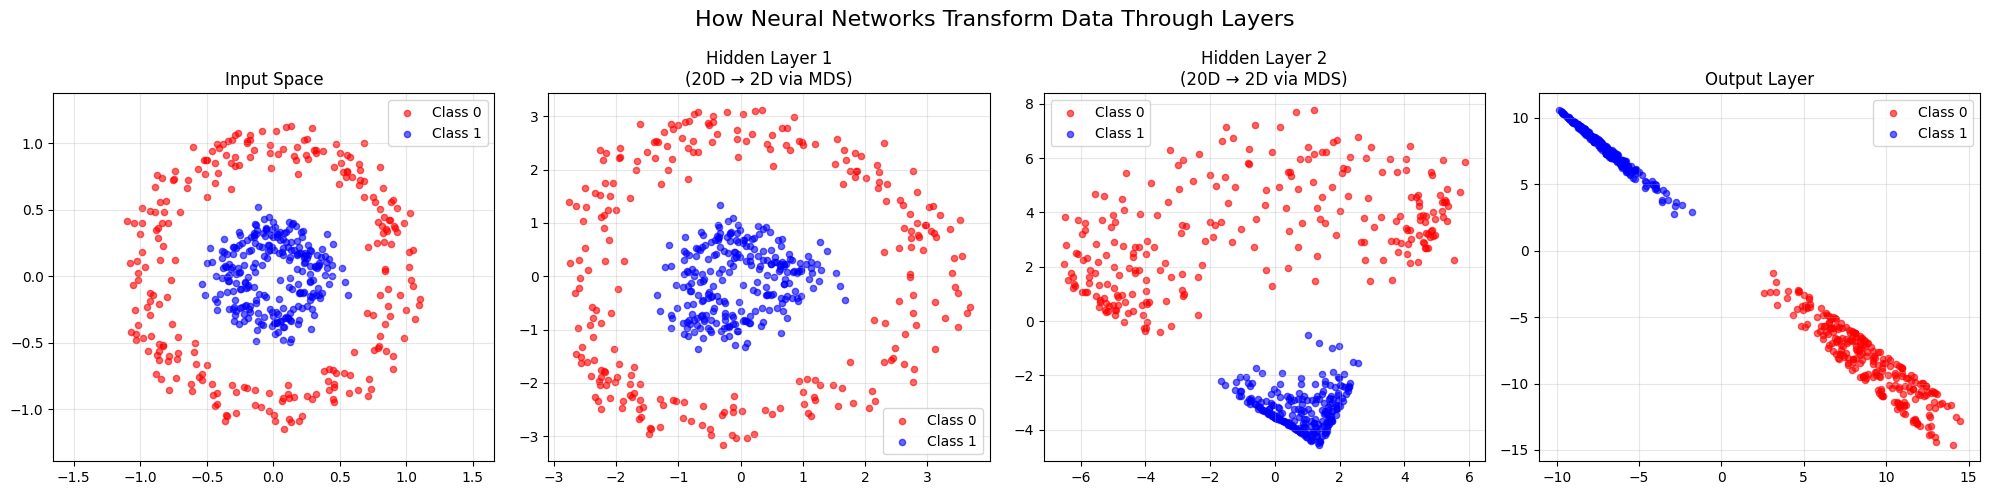

In [71]:
visualize_layer_transformations(model, X_train, y_train)

This plot beautifully visualizes how the MLP learns to **progressively transform** the data representation to make it linearly separable:

- **Input Space**: Circular pattern - impossible to separate with a straight line
- **Hidden Layer 1**: Network begins to "stretch" and distort the circular boundary
- **Hidden Layer 2**: Classes become more separated, but still curved
- **Output Layer**: **Perfect linear separation!** The two classes form distinct diagonal lines

Neural networks solve complex problems by learning to **transform the data** into new representations where simple solutions (like straight lines) become possible. This is the essence of deep learning - finding the right representation.

---
<br><br>
# How Neural Networks Actually Learn: Gradient Descent and Backpropagation

How does the network figure out the right transformations? 

We've seen neural networks perform amazing feats - approximating sine functions and learning circular decision boundaries. But we haven't explained the **learning mechanism** itself. How does the network know which weights to adjust and by how much?

The answer lies in two fundamental algorithms that power all of deep learning:
- **Gradient Descent**: The optimization strategy
- **Backpropagation**: The method for computing gradients

Let's dive into the mathematical engine that makes neural network learning possible.

## Gradient Descent

Let's understand **gradient descent** with the simplest possible example: fitting a straight line to data.

We have some data points and want to find the best line `y = mx + b` that fits them. We'll start with **random** values for slope (m) and intercept (b), then watch gradient descent automatically improve them. This is basically what we did in the chapter on optimization methods in the first Notebook.

As we know, Linear regression has a **closed-form solution**. However, for more complex problems like neural networks, closed-form solutions don't exist. That's why we introduce gradient descent with this simple example first, even though we could solve it directly.

**Intuition**: Gradient descent is like being blindfolded on a hill and trying to reach the bottom. You feel the slope under your feet and take steps in the steepest downward direction.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Generate simple linear data with some noise
np.random.seed(42)
torch.manual_seed(42)
X = np.linspace(-10, 10, 50)
y_true = 2.5 * X + 1.0 + np.random.normal(0, 1, 50)  # True line: y = 2.5x + 1.0

# Convert to tensors
X_tensor = torch.tensor(X.reshape(-1, 1), dtype=torch.float32)
y_tensor = torch.tensor(y_true.reshape(-1, 1), dtype=torch.float32)

def plot_single_epoch(X, y_true, epoch, weight, bias, loss):
    """Plot the line fit for a single epoch"""
    plt.figure(figsize=(6, 6))
    
    # Plot data and current line
    plt.scatter(X, y_true, alpha=0.6, color='blue', label='Data', s=50)
    x_line = np.linspace(-10, 10, 100)
    y_line = weight * x_line + bias
    plt.plot(x_line, y_line, 'r-', linewidth=3, label=f'Model (epoch {epoch})')
    
    # When plotting each epoch
    y_pred_current = bias + weight * X
    current_loss_display = np.mean((y_true - y_pred_current) ** 2)  # MSE for display

    plt.title(f'Epoch {epoch}\nSlope (m) = {weight:.3f}, Intercept (b) = {bias:.3f}\nLoss = {current_loss_display:.3f}', 
              fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Simple linear model
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        # Initialize with random weights - this is where we start!
        nn.init.uniform_(self.linear.weight, -3, -1)
        nn.init.uniform_(self.linear.bias, 10, 11)
    
    def forward(self, x):
        return self.linear(x)

# Create model and optimizer
lr = 0.01
model = SimpleLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()

Starting gradient descent with learning rate: 0.01
Target: slope=2.5, intercept=1.0


EPOCH 0 (Initial random weights):
Slope (weight): -2.234
Intercept (bias): 10.959
Loss: 872.666



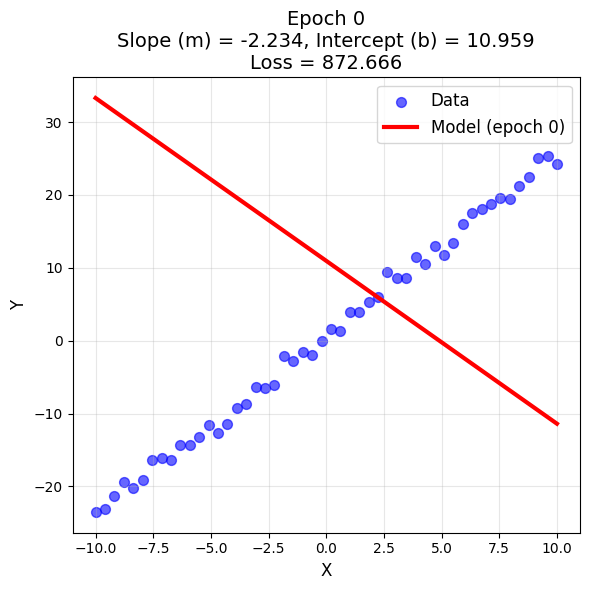

In [ ]:
# Initial state - before any training
w0_hist = []  # bias (intercept) history
w1_hist = []  # weight (slope) history  
rmse_hist = []  # RMSE history

y_pred = model(X_tensor)
initial_loss = criterion(y_pred, y_tensor)

w0_hist.append(model.linear.bias.item())
w1_hist.append(model.linear.weight.item())
rmse_hist.append(np.mean((y_true - model.linear.bias.item() + model.linear.weight.item() * X) ** 2))  # MSE for display)

plot_single_epoch(X, y_true, 0, 
                  model.linear.weight.item(), 
                  model.linear.bias.item(), 
                  initial_loss.item())

Above we see our **randomly initialized** model at the start (epoch 0). The red line shows our initial guess:
- **Slope (m)** = -2.234 
- **Intercept (b)** = 10.959
- **Loss** = 872.666

This is clearly a terrible fit! The line goes in completely the wrong direction compared to our data points. But that's exactly the point - gradient descent will fix this automatically.

## How Gradient Descent Works

Now we'll perform **one iteration** of gradient descent to see how the algorithm improves our model:

1. **Calculate the gradient**: For each parameter (slope and intercept), we compute how much the loss would change if we slightly increased that parameter
2. **Take a step**: We move each parameter in the direction that reduces the loss the most
3. **Update the model**: Our line gets a little bit better

The **learning rate** controls how big steps we take. Too small = slow progress. Too large = we might overshoot the optimum.

Let's see what happens after just **one step** of gradient descent.

EPOCH 1 (After first gradient descent step):
Slope (weight): 1.031
Intercept (bias): 10.756
Loss: 872.666



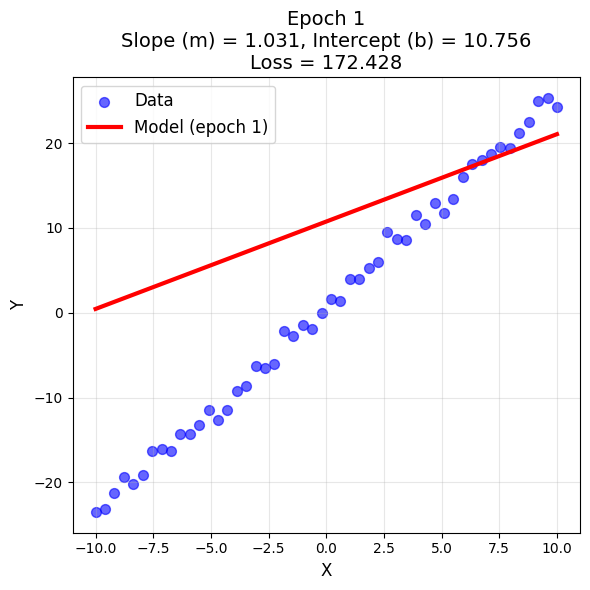

In [ ]:
# First training step
y_pred = model(X_tensor)
loss = criterion(y_pred, y_tensor)

# Backward pass and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

w0_hist.append(model.linear.bias.item())
w1_hist.append(model.linear.weight.item())
rmse_hist.append(np.mean((y_true - model.linear.bias.item() + model.linear.weight.item() * X) ** 2))  # MSE for display)

plot_single_epoch(X, y_true, 1, 
                  model.linear.weight.item(), 
                  model.linear.bias.item(), 
                  loss.item())

Look at the dramatic improvement after just **one iteration**:

- **Slope (m)**: -2.234 → 1.031 (now positive, matching the data trend!)
- **Intercept (b)**: 10.959 → 10.756 (slight adjustment)
- **Loss**: 872.666 → 172.428

The algorithm immediately figured out that the slope should be **positive** instead of negative. The line now goes in the right direction and fits much better! Let's continue!

EPOCH 2 (After second gradient descent step):
Slope (weight): 2.030
Intercept (bias): 10.556
Loss: 172.428



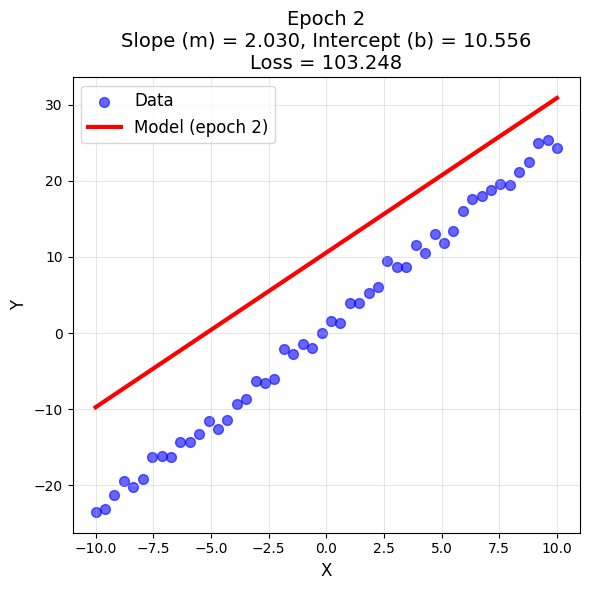

In [ ]:
# Second training step
y_pred = model(X_tensor)
loss = criterion(y_pred, y_tensor)

optimizer.zero_grad()
loss.backward()
optimizer.step()

w0_hist.append(model.linear.bias.item())
w1_hist.append(model.linear.weight.item())
rmse_hist.append(np.mean((y_true - model.linear.bias.item() + model.linear.weight.item() * X) ** 2))  # MSE for display)

plot_single_epoch(X, y_true, 2, 
                  model.linear.weight.item(), 
                  model.linear.bias.item(), 
                  loss.item())

Great progress! After the second iteration:

- **Slope (m)**: 1.031 → 2.030 (getting closer to the optimal slope)
- **Intercept (b)**: 10.756 → 10.556
- **Loss**: 172.428 → 103.248 

The loss calculation properly reflects the current model's performance. Notice how the line fits much better - it's passing closer to the data points.

Gradient descent is working! Each step makes the model better by following the steepest downward slope in our loss landscape.

Now let's **fast-forward** to see what happens after **200 iterations** of training...

Training and collecting trajectory data...
Epoch 10: Loss = 72.931, Weight = 2.471, Bias = 9.266, RMSE = 8.540
Epoch 50: Loss = 15.149, Weight = 2.471, Bias = 4.559, RMSE = 3.892
Epoch 200: Loss = 0.859, Weight = 2.471, Bias = 0.957, RMSE = 0.927

Final result after 200 epochs:
Slope (weight): 2.471 (target: 2.5)
Intercept (bias): 0.954 (target: 1.0)


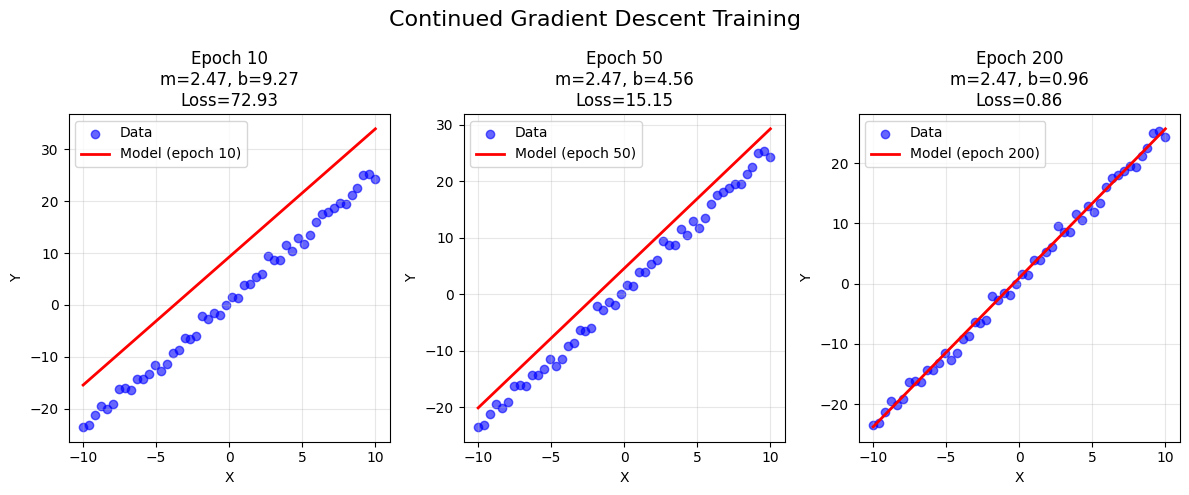

In [ ]:
def plot_multiple_epochs(X, y_true, epoch_params):
    """Plot multiple epochs side by side"""
    n_plots = len(epoch_params)
    fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, (epoch, weight, bias, loss) in enumerate(epoch_params):
        axes[i].scatter(X, y_true, alpha=0.6, color='blue', label='Data')
        x_line = np.linspace(-10, 10, 100)
        y_line = weight * x_line + bias
        axes[i].plot(x_line, y_line, 'r-', linewidth=2, 
                    label=f'Model (epoch {epoch})')
        
        axes[i].set_title(f'Epoch {epoch}\nm={weight:.2f}, b={bias:.2f}\nLoss={loss:.2f}')
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.suptitle('Continued Gradient Descent Training', fontsize=16)
    plt.tight_layout()
    plt.show()

# Continue training and capture specific epochs
epochs_to_plot = [10, 50, 200]
epoch_params = []

# Modified training loop to collect data directly in the format needed for RMSE plot
for epoch in range(3, 201):  # Continue from epoch 4
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    
    # Get current parameters
    current_weight = model.linear.weight.item()
    current_bias = model.linear.bias.item()
    current_loss = loss.item()
    
    # Calculate RMSE directly
    y_pred_numpy = current_bias + current_weight * X  # w0 + w1 * X
    current_rmse = np.sqrt(np.mean((y_true - y_pred_numpy) ** 2))
    
    # Store data in format needed for RMSE plot
    w0_hist.append(current_bias)    # intercept
    w1_hist.append(current_weight)  # slope
    rmse_hist.append(current_rmse)  # RMSE
    
    # Also store specific epochs for progression plot
    if epoch in epochs_to_plot:
        epoch_params.append((epoch, current_weight, current_bias, current_loss))
        print(f"Epoch {epoch}: Loss = {current_loss:.3f}, Weight = {current_weight:.3f}, Bias = {current_bias:.3f}, RMSE = {current_rmse:.3f}")
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the progression
plot_multiple_epochs(X, y_true, epoch_params)

Amazing! Look at how quickly gradient descent converged:

- **Epoch 10**: Already a good fit! (m=2.47, b=9.27, Loss=72.93)
- **Epoch 50**: Getting closer (m=2.47, b=4.56, Loss=15.15) 
- **Epoch 200**: Final convergence (m=2.47, b=0.96, Loss=0.86)

Notice how the **slope (m)** converged quickly to 2.47 and stayed there, while the **intercept (b)** took longer to reach its optimal value around 1.0. The loss dropped dramatically from 72.93 to 0.86!

This shows gradient descent's typical behavior - it makes rapid progress initially, then fine-tunes more slowly as it approaches the optimum.

## Visualizing the Journey: Loss Landscape

Now let's see the **big picture**! We can visualize this entire journey on the **loss landscape** - a 3D surface showing how the loss changes for different parameter values.

Calculating optimal parameter ranges...
Trajectory ranges: w0=[0.957, 10.959], w1=[-2.234, 2.471]
Using offsets: w0_offset=50.010, w1_offset=14.116
Closed-form Optimum: w0 = 0.775, w1 = 2.471
RMSE of Closed-form Optimum: 0.908


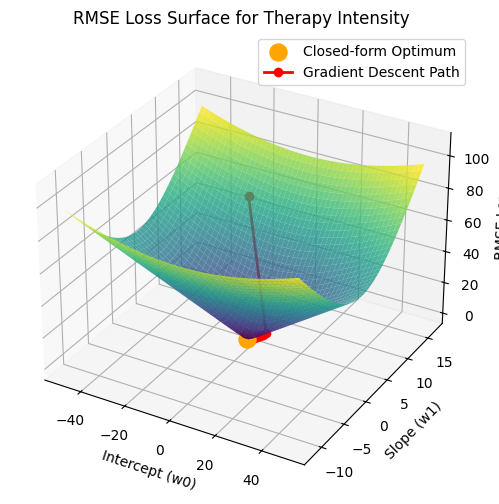

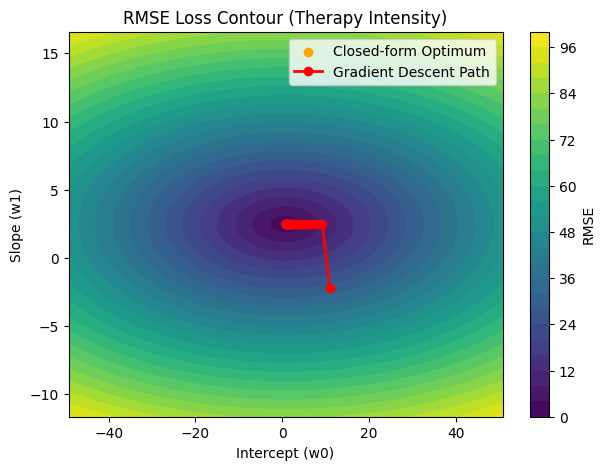

In [ ]:
from helper import downsample_history, plot_rmse_loss_surface_with_arrow

w0_history_ds, w1_history_ds, rmse_history_ds = downsample_history(w0_hist, w1_hist, rmse_hist, k=10)

# Get the actual parameter ranges from trajectory
w0_min, w0_max = min(w0_hist), max(w0_hist)
w1_min, w1_max = min(w1_hist), max(w1_hist)

# Add padding to make the trajectory clearly visible
w0_padding = (w0_max - w0_min) * 5  # 50% padding
w1_padding = (w1_max - w1_min) * 3  # 50% padding

# Ensure minimum range for nice visualization
min_range = 0.5
w0_range_offset = max(w0_padding, min_range)
w1_range_offset = max(w1_padding, min_range)

# Use dynamic ranges
plot_rmse_loss_surface_with_arrow(X, y_true, w0_history_ds, w1_history_ds, rmse_history_ds, 
                                 w0_range_offset=w0_range_offset,  
                                 w1_range_offset=w1_range_offset, 
                                 grid_points=50)

#plot_rmse_loss_surface_with_arrow(X, y_true, w0_history_ds, w1_history_ds, rmse_history_ds)#, w0_range_offset=1, w1_range_offset=3, grid_points=100)

Here we see our gradient descent path on the loss landscape! The red line shows the route from initial random parameters to the optimal solution (gold star).

Notice the **diagonal contours** and how the algorithm efficiently follows the steepest descent path downhill.

## From Simple Lines to Neural Networks: Backpropagation

This linear regression example perfectly illustrates gradient descent fundamentals, but the real power comes with **complex models** like neural networks where:

- There's **no closed-form solution** (unlike our linear regression)
- We have **millions or billions** of parameters to optimize
- The loss landscape is **highly non-linear** and complex

For neural networks, we use **backpropagation** - which is just gradient descent applied layer by layer through the network. Let's see how the same principles scale up.

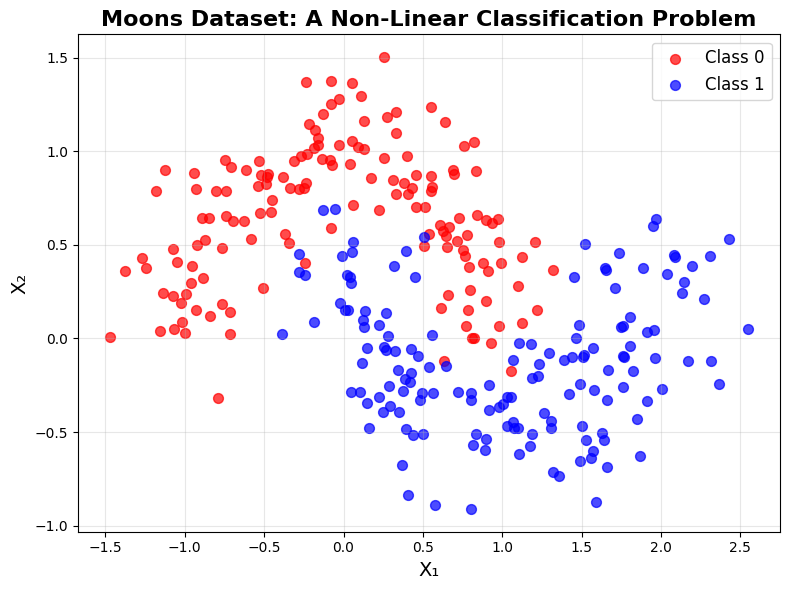

Dataset shape: (300, 2)
Class distribution: [150 150]


In [337]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Create the moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot the moons data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
labels = ['Class 0', 'Class 1']

for i in range(2):
    mask = y_moons == i
    plt.scatter(X_moons[mask, 0], X_moons[mask, 1], 
               c=colors[i], alpha=0.7, s=50, label=labels[i])

plt.xlabel('X₁', fontsize=14)
plt.ylabel('X₂', fontsize=14)
plt.title('Moons Dataset: A Non-Linear Classification Problem', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X_moons.shape}")
print(f"Class distribution: {np.bincount(y_moons)}")

Let's use a **moons dataset** - two interleaving half-circles that create a classic non-linear classification challenge.

No straight line can separate these crescent shapes! We need a **curved decision boundary** that can wrap around the moons. Now we train a neural network to learn the boundary that perfectly separates the red and blue crescents.

Let's start with defining the MLP.

We'll create a simple **3-layer neural network**:
- **Input layer**: 2 neurons (for X₁, X₂ coordinates)
- **Hidden layers**: 20 neurons each with ReLU activation
- **Output layer**: 1 neuron with sigmoid activation (probability of Class 1)

In [338]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNeuralNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(SimpleNeuralNet, self).__init__()
        self.layer1 = nn.Linear(2, hidden_size)  # Input: 2D coordinates
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, 1)  # Output: probability
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Create the model
model = SimpleNeuralNet(hidden_size=20)
print("Neural Network Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

Neural Network Architecture:
SimpleNeuralNet(
  (layer1): Linear(in_features=2, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 501


Now we train the network and visualize how the **decision boundary evolves**:

- **Loss function**: Binary Cross-Entropy (measures classification error)
- **Optimizer**: SGD (Stochastic Gradient Descent)
- **Learning rate**: 0.5
- **Batch size**: 32 samples per update

### Mini-Batches
Instead of using all 300 samples at once, we use **batches of 32 samples**. We compute gradients on each batch and update weights. This is faster, uses less memory, and provides more stable learning than updating after every single sample.

Let's see how the decision boundary starts random and gradually learns to separate the moons.

In [339]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X_moons)
y_tensor = torch.FloatTensor(y_moons).unsqueeze(1)

# Create DataLoader for batching
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Reinitialize model to start fresh
model = SimpleNeuralNet(hidden_size=20)

# Training setup
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Storage for results
epochs_to_show = [1, 10, 100, 1000]
total_epochs = max(epochs_to_show)
losses = []
snapshots = {}

print("Training Neural Network with Mini-Batch SGD...")
print("=" * 50)

# Training loop
for epoch in range(total_epochs + 1):
    epoch_loss = 0.0
    num_batches = 0
    
    # Process all batches in this epoch
    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        if epoch > 0:  # Skip optimization for epoch 0
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        epoch_loss += loss.item()
        num_batches += 1
    
    # Average loss for this epoch
    avg_loss = epoch_loss / num_batches
    losses.append(avg_loss)
    
    # Save snapshots at specific epochs
    if epoch in epochs_to_show:
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")
        # Save a deep copy of the model state
        snapshots[epoch] = {
            'weights': {name: param.data.clone() for name, param in model.named_parameters()},
            'loss': avg_loss
        }

print("Training completed!")

Training Neural Network with Mini-Batch SGD...
Epoch 1: Loss = 0.5986
Epoch 10: Loss = 0.2403
Epoch 100: Loss = 0.0831
Epoch 1000: Loss = 0.0482
Training completed!


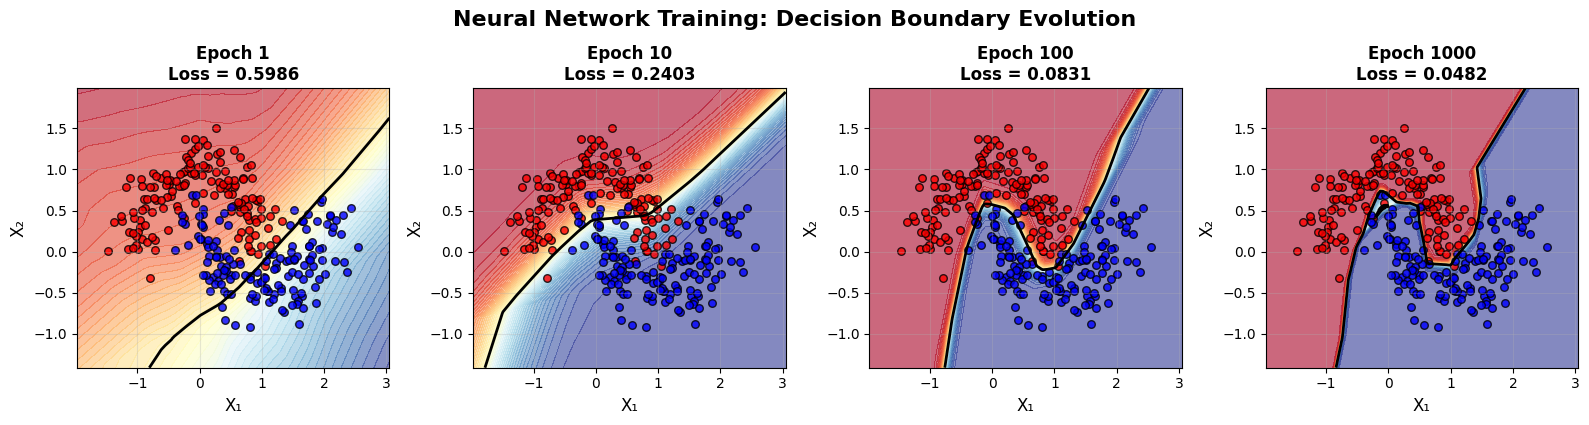

In [340]:
# Create subplot visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, epoch in enumerate(epochs_to_show):
    ax = axes[idx]
    
    # Temporarily load the saved weights for this epoch
    saved_weights = snapshots[epoch]['weights']
    original_weights = {name: param.data.clone() for name, param in model.named_parameters()}
    
    # Load saved weights
    for name, param in model.named_parameters():
        param.data = saved_weights[name]
    
    loss_val = snapshots[epoch]['loss']
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Get predictions
    mesh_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(mesh_points).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    contour = ax.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y_moons == i
        ax.scatter(X_moons[mask, 0], X_moons[mask, 1], 
                  c=colors[i], alpha=0.8, s=30, edgecolors='black')
    
    ax.set_xlabel('X₁', fontsize=12)
    ax.set_ylabel('X₂', fontsize=12)
    ax.set_title(f'Epoch {epoch}\nLoss = {loss_val:.4f}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Restore original weights
    for name, param in model.named_parameters():
        param.data = original_weights[name]

plt.tight_layout()
plt.suptitle('Neural Network Training: Decision Boundary Evolution', 
             fontsize=16, fontweight='bold', y=1.05)
plt.show()

The neural network learns to separate the moons through pure gradient descent:

The decision boundary transforms from a rough line into a smooth curve that perfectly wraps around each moon. Now let's plot how the loss decreased throughout training.

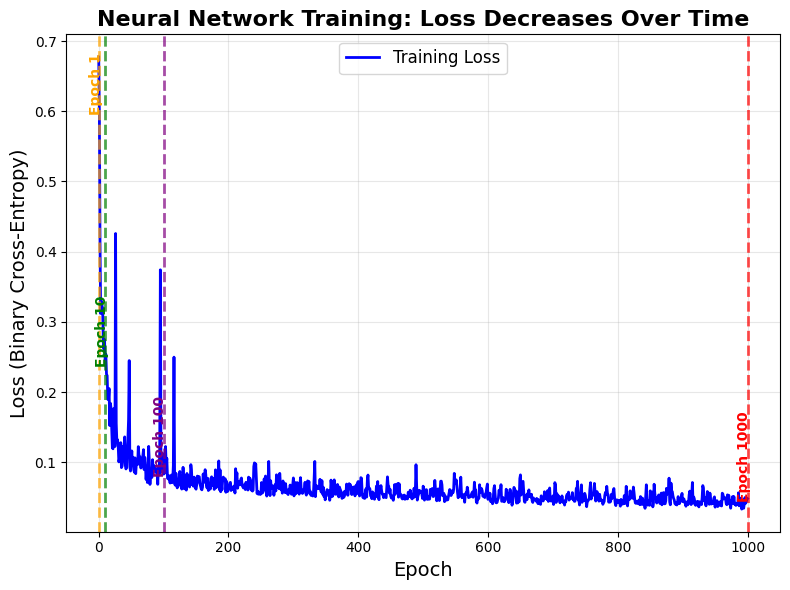

Initial loss: 0.6773
Final loss: 0.0482
Loss reduction: 92.9%


In [341]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(range(len(losses)), losses, 'b-', linewidth=2, label='Training Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=14)
plt.title('Neural Network Training: Loss Decreases Over Time', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add vertical lines at the epochs we visualized
epochs_shown = [1, 10, 100, 1000]
colors_lines = ['orange', 'green', 'purple', 'red']
for epoch, color in zip(epochs_shown, colors_lines):
    if epoch < len(losses):
        plt.axvline(x=epoch, color=color, linestyle='--', alpha=0.7, linewidth=2)
        plt.text(epoch-5, losses[epoch], f'Epoch {epoch}', 
                rotation=90, fontsize=10, ha='center', color=color, fontweight='bold')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Initial loss: {losses[0]:.4f}")
print(f"Final loss: {losses[-1]:.4f}")
print(f"Loss reduction: {((losses[0] - losses[-1]) / losses[0] * 100):.1f}%")

This loss curve tells the complete story of gradient descent in action:

- **Rapid initial drop**: Loss plummets from 0.71 to ~0.25 in just 100 epochs
- **Steady refinement**: Gradual improvement as the boundary gets fine-tuned
- **Convergence**: Loss stabilizes around 0.06 - the network has learned!

The steep initial descent followed by gradual refinement is the signature of successful neural network training.

---
<br><br>
# Hyperparameter Tuning: The Art of Neural Networks

In neural networks, there are **tons of parameters** that can be flexibly chosen to optimize performance:

- **Learning rate**: How big steps to take during gradient descent
- **Number of layers**: Network depth (deeper = more complex patterns)
- **Layer dimensions**: How many neurons per layer
- **Number of iterations**: How long to train
- **Batch size**
- **And many more** once we introduce advanced techniques (optimizers, regularization, etc.)

Let's experiment with a different learning rates to see how they affect our moon classification.

In [349]:
# Compare different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.8]
total_epochs = 500
all_losses = {}

for lr in learning_rates:
    
    # Reinitialize model for each learning rate
    model = SimpleNeuralNet(hidden_size=20)
    
    # Training setup
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Storage for this learning rate
    losses = []
    
    # Training loop
    for epoch in range(total_epochs + 1):
        epoch_loss = 0.0
        num_batches = 0
        
        # Process all batches in this epoch
        for batch_X, batch_y in dataloader:
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Backward pass and optimization
            if epoch > 0:  # Skip optimization for epoch 0
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            epoch_loss += loss.item()
            num_batches += 1
        
        # Average loss for this epoch
        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)
    
    # Store results
    all_losses[lr] = losses

Now after training 4 models, let's plot the losses and compare!

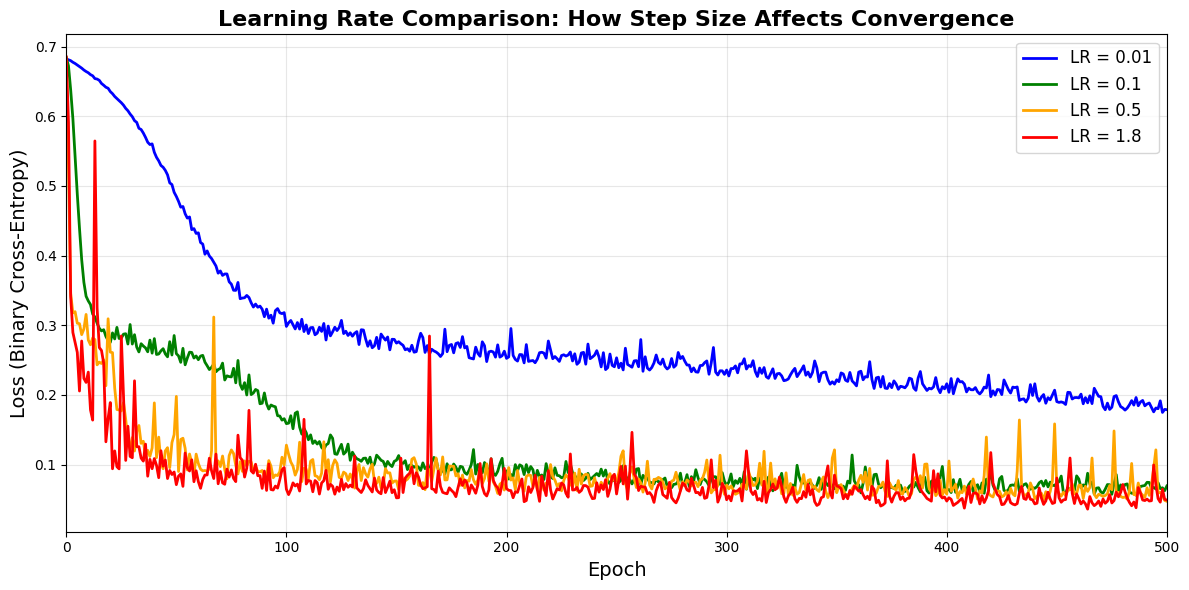

In [350]:
# Plot comparison of learning rates
plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'orange', 'red']
labels = [f'LR = {lr}' for lr in learning_rates]

for i, lr in enumerate(learning_rates):
    plt.plot(range(len(all_losses[lr])), all_losses[lr], 
             color=colors[i], linewidth=2, label=labels[i])

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=14)
plt.title('Learning Rate Comparison: How Step Size Affects Convergence', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, total_epochs)
plt.tight_layout()
plt.show()

## Learning Rate Analysis: Finding the Sweet Spot

- **LR = 0.01 (Blue)**: Very slow learner - was still improving after 500 epochs, showing steady but glacial progress.
- **LR = 0.1 (Green)**: Learns faster and reaches a stable loss quite quickly - a good balance of speed and stability.
- **LR = 0.5 (Orange)**: Learned even faster but started to show signs of instability later on with occasional spikes.
- **LR = 1.8 (Red)**: Learned even faster initially but was much more unstable throughout training with frequent oscillations.

**The Goldilocks Principle**: Low learning rates are stable but slow, while high learning rates are fast but unstable. The art is finding the rate that's "just right" for your specific problem.

Now that we understand the fundamentals of Deep Learning, we're ready to explore more sophisticated architectures. Next, we'll dive into **Convolutional Neural Networks (CNNs)** - the powerhouse behind computer vision breakthroughs.

# Convolutional Neural Networks: Processing Images

**Convolutional Neural Networks (CNNs)** are specialized neural networks designed to process **grid-like data** - especially images. While regular neural networks treat each pixel independently, CNNs understand that **nearby pixels are related** and should be processed together.

Instead of looking at the entire image at once, CNNs use **small filters** that scan across the image, detecting local features like:
- **Edges and lines** (low-level features)
- **Shapes and textures** (mid-level features)  
- **Complex patterns** (high-level features)

This hierarchical approach builds up understanding from simple to complex features.

This makes them perfect for applications like medical imaging, where detecting patterns in X-rays or MRI scans can assist in diagnosis.

Let's start with a simple example using **MNIST digits** to understand CNN fundamentals, then see how these same principles scale to real-world image recognition tasks.

## Quick Recap MNIST

The **MNIST dataset** is a classic benchmark in machine learning, consisting of 70,000 grayscale images of handwritten digits (0–9), each 28×28 pixels in size. Its simplicity and visual clarity make it ideal for understanding data science techniques before applying them to more complex, real-world datasets.


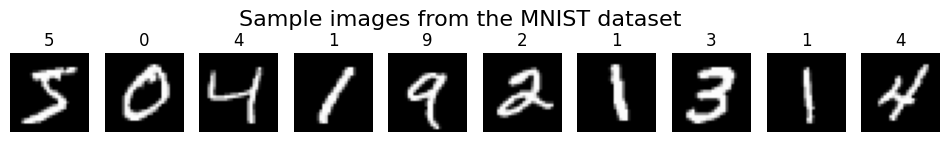

In [351]:
from helper import plot_mnist
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
plot_mnist(mnist)

Now let's prepare the data first, such that we can use it afterwards for training the CNN.

In [356]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Use a subset of MNIST for faster training
X, y = mnist.data, mnist.target.astype(int)

# Take only 10,000 samples (about 14% of full dataset)
subset_size = 10000
indices = np.random.choice(len(X), subset_size, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# Split the subset
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

# Reshape for CNN (batch_size, channels, height, width)
# MNIST is grayscale so channels = 1
X_train_cnn = X_train.reshape(-1, 1, 28, 28) / 255.0  # Normalize to [0,1]
X_test_cnn = X_test.reshape(-1, 1, 28, 28) / 255.0

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_cnn)
X_test_tensor = torch.FloatTensor(X_test_cnn)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print(f"Using subset: {subset_size:,} total samples")
print(f"Training set: {X_train_tensor.shape[0]:,} images")
print(f"Test set: {X_test_tensor.shape[0]:,} images")
print(f"Reduction: {subset_size/len(X)*100:.1f}% of original dataset")

Using subset: 10,000 total samples
Training set: 8,000 images
Test set: 2,000 images
Reduction: 14.3% of original dataset


Now that we got the data prepared, let's define a simple CNN!

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # After 2 pooling operations: 28->14->7
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0-9
        
        # Activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # First conv block: Conv -> ReLU -> Pool
        x = self.pool(self.relu(self.conv1(x)))  # Shape: (batch, 32, 14, 14)
        
        # Second conv block: Conv -> ReLU -> Pool  
        x = self.pool(self.relu(self.conv2(x)))  # Shape: (batch, 64, 7, 7)
        
        # Flatten for fully connected layers
        x = x.view(-1, 64 * 7 * 7)  # Shape: (batch, 3136)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))  # Shape: (batch, 128)
        x = self.dropout(x)
        x = self.fc2(x)  # Shape: (batch, 10)
        
        return x

# Initialize the model
cnn_model = SimpleCNN()
#print("CNN Architecture:")
#print(cnn_model)

# Count parameters
#total_params = sum(p.numel() for p in cnn_model.parameters())
#print(f"\nTotal parameters: {total_params:,}")

CNN Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

Total parameters: 421,642


## Understanding the CNN Architecture

### Convolutional Layers: The Heart of CNNs

**Convolutional layers** are what make CNNs special. Instead of connecting every pixel to every neuron, they use small **filters** (or kernels) that slide across the image:

- **In/Out Channels**: Think of channels as "color layers." MNIST has 1 channel (grayscale), while RGB images have 3. Our first layer takes 1 input channel and produces 32 output channels - essentially creating 32 different "feature maps" that detect different patterns.

- **Kernel Size**: The 3×3 kernel size means each filter looks at a 3×3 pixel neighborhood at a time. This is small enough to detect local features like edges and corners.

- **Padding**: Adding padding=1 means we add a border of zeros around the image. This ensures that pixels at the edges get processed just as much as pixels in the center, keeping our output the same size as the input.

### Pooling: Reducing Complexity

**Max pooling** takes the maximum value from each 2×2 region, effectively reducing the image size by half (28×28 → 14×14 → 7×7). This:
- Reduces computational cost
- Makes the network more robust to small shifts in the image
- Helps focus on the most important features

### The Feature Hierarchy

Our CNN builds understanding in layers:
1. **First conv layer**: Detects basic edges and lines
2. **Second conv layer**: Combines edges into shapes and textures  
3. **Fully connected layers**: Combines all features to classify the digit (10 Outcome classes for a probability for each digit)

<img src="imgs/cnn.png" alt="Convolutional Neural Network" width="800"/>

Let's explore the training and test performance of our model during training!

In [358]:
# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to device
cnn_model = cnn_model.to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training setup
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)

# Training parameters
num_epochs = 20
train_losses = []
test_losses = []

print("Training CNN with Stochastic Gradient Descent...")
print("=" * 55)

# Training loop
for epoch in range(num_epochs):
    # Training phase
    cnn_model.train()
    train_loss = 0.0
    train_batches = 0
    
    for batch_X, batch_y in train_loader:
        # Move data to device
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Forward pass
        outputs = cnn_model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_batches += 1
    
    # Evaluation phase
    cnn_model.eval()
    test_loss = 0.0
    test_batches = 0
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            # Move data to device
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            outputs = cnn_model(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
            test_batches += 1
    
    # Calculate average losses
    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches
    
    # Record all losses
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    # Print progress every 5 epochs
    if epoch % 5 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch+1:2d}/{num_epochs}: Train Loss = {avg_train_loss:.4f}, Test Loss = {avg_test_loss:.4f}")

print("\nTraining completed!")

Using device: cpu
Training CNN with Stochastic Gradient Descent...
Epoch  1/20: Train Loss = 1.4514, Test Loss = 0.4969
Epoch  6/20: Train Loss = 0.1617, Test Loss = 0.1304
Epoch 11/20: Train Loss = 0.0981, Test Loss = 0.1050
Epoch 16/20: Train Loss = 0.0629, Test Loss = 0.0874
Epoch 20/20: Train Loss = 0.0470, Test Loss = 0.0790

Training completed!


We finished training our model, let's visualize how the loss behaved!

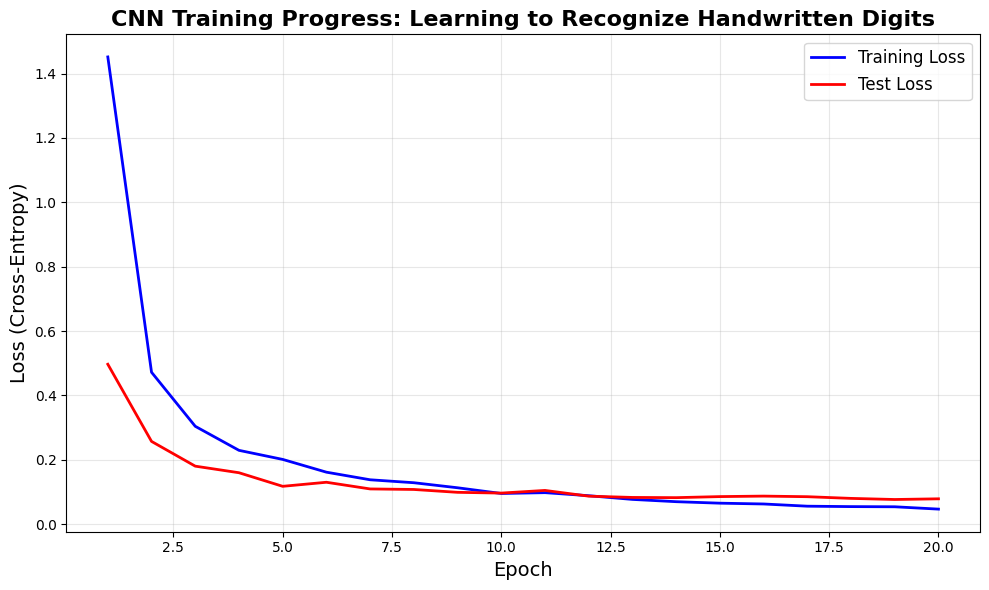

Final Training Loss: 0.0470
Final Test Loss: 0.0790
Gap (Overfitting indicator): -0.0320


In [ ]:
# Plot training and test losses
plt.figure(figsize=(10, 6))

epochs_range = range(1, num_epochs + 1)
plt.plot(epochs_range, train_losses, 'b-', linewidth=2, label='Training Loss')
plt.plot(epochs_range, test_losses, 'r-', linewidth=2, label='Test Loss')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (Cross-Entropy)', fontsize=14)
plt.title('CNN Training Progress: Learning to Recognize Handwritten Digits', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Looking at our loss curves, we can see that **the CNN successfully learned to distinguish between different handwritten digits**. Both training and test losses decrease rapidly in the first few epochs, then stabilize at low values around 0.1. 

Importantly, the **test loss closely follows the training loss** throughout training, indicating that our model **generalizes well** to unseen data rather than just memorizing the training examples.

Now let's investigate some of the filters and results after pooling to get a better intuitive understanding.

In [376]:
# Function to get feature maps from different layers
def get_feature_maps(model, x, layer_name):
    """Extract feature maps from a specific layer"""
    activation = {}
    
    def hook_fn(module, input, output):
        activation[layer_name] = output.detach()
    
    # Register hook based on layer name
    if layer_name == 'conv1':
        handle = model.conv1.register_forward_hook(hook_fn)
    elif layer_name == 'conv2':
        handle = model.conv2.register_forward_hook(hook_fn)
    
    # Forward pass
    model(x)
    
    # Remove hook
    handle.remove()
    
    return activation[layer_name]

# Get a sample image (let's use the first test image)
sample_image = X_test_tensor[0:1].to(device)  # Shape: (1, 1, 28, 28)
sample_label = y_test_tensor[0].item()

# Get feature maps from both conv layers
cnn_model.eval()
with torch.no_grad():
    conv1_features = get_feature_maps(cnn_model, sample_image, 'conv1')  # (1, 32, 28, 28)
    conv2_features = get_feature_maps(cnn_model, sample_image, 'conv2')  # (1, 64, 14, 14)

# Convert to numpy for plotting
conv1_maps = conv1_features[0].cpu().numpy()  # (32, 28, 28)
conv2_maps = conv2_features[0].cpu().numpy()  # (64, 14, 14)
original_img = sample_image[0, 0].cpu().numpy()  # (28, 28)

print(f"Analyzing digit: {sample_label}")
print(f"Conv1 feature maps shape: {conv1_maps.shape}")
print(f"Conv2 feature maps shape: {conv2_maps.shape}")

Analyzing digit: 8
Conv1 feature maps shape: (32, 28, 28)
Conv2 feature maps shape: (64, 14, 14)


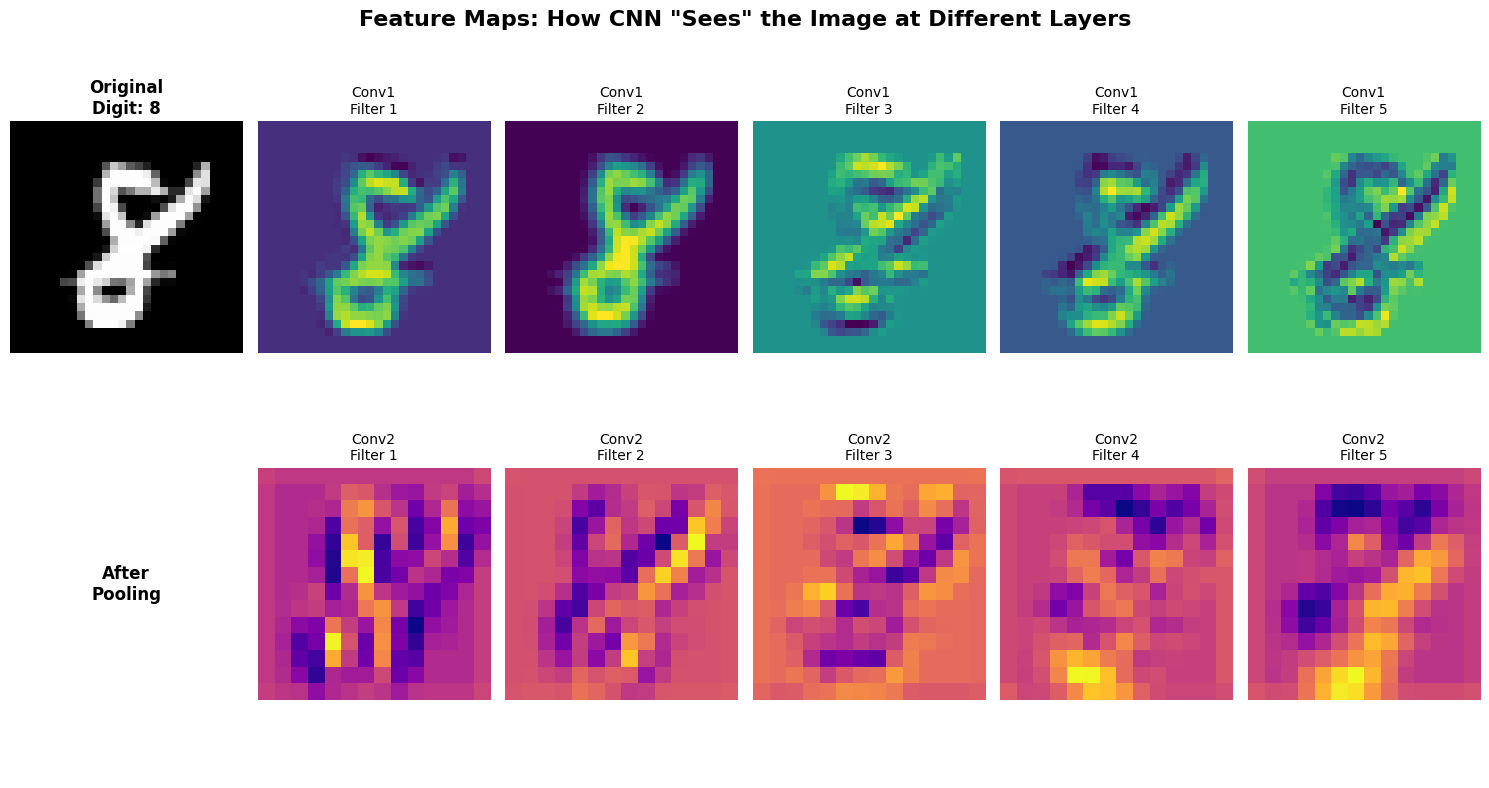

In [382]:
# Plot original image and feature maps in 2 levels
fig = plt.figure(figsize=(15, 8))

# TOP LEVEL: Original + Conv1 feature maps
# Original image
plt.subplot(2, 6, 1)
plt.imshow(original_img, cmap='gray')
plt.title(f'Original\nDigit: {sample_label}', fontsize=12, fontweight='bold')
plt.axis('off')

# First conv layer feature maps (show first 5)
for i in range(5):
    plt.subplot(2, 6, i + 2)
    plt.imshow(conv1_maps[i], cmap='viridis')
    plt.title(f'Conv1\nFilter {i+1}', fontsize=10)
    plt.axis('off')

# BOTTOM LEVEL: Conv2 feature maps after pooling
for i in range(5):
    plt.subplot(2, 6, i + 8)
    plt.imshow(conv2_maps[i], cmap='plasma')
    plt.title(f'Conv2\nFilter {i+1}', fontsize=10)
    plt.axis('off')

# Add separator text in the remaining spot
plt.subplot(2, 6, 7)
plt.text(0.5, 0.5, 'After\nPooling', ha='center', va='center', fontsize=12, fontweight='bold')
plt.axis('off')

plt.suptitle('Feature Maps: How CNN "Sees" the Image at Different Layers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Looking at our feature maps, we can see exactly how the CNN processes the digit "8":

**Top Row (Conv1)**: Each filter detects different basic features like edges, curves, and lines.

**Bottom Row (Conv2, after pooling)**: The second layer starts combining these basic features into more complex patterns. The representations also become more compact through pooling.

The bright yellow/green regions show where each filter "fires" most strongly, revealing what visual patterns the network considers important for identifying this particular digit.

---

## Analyzing Intermediate Representations

Beyond individual filters, we can also analyze how the network transforms entire images through its layers. Let's examine the **vector representations** that emerge after:
1. **Flattened convolutional features** (3,136 dimensions)
2. **First linear layer** (128 dimensions) 
3. **Final linear layer** (10 dimensions)

Using MDS, we can visualize how different digits cluster in these high-dimensional spaces:

In [378]:
class CNNWithRepresentations(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Convolutional layers
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        
        # Flatten
        x = x.view(x.size(0), -1)
        self.flattened_repr = x  # Store flattened conv features
        
        # First FC layer
        fc1_out = self.relu(self.fc1(x))
        self.fc1_repr = fc1_out  # Store FC1 representations
        
        # Second FC layer (output)
        fc2_out = self.fc2(fc1_out)
        self.fc2_repr = fc2_out  # Store FC2 representations (logits)
        
        return fc2_out
    
    def get_representations(self, x):
        """Get intermediate representations for visualization"""
        with torch.no_grad():
            output = self.forward(x)
            return {
                'flattened': self.flattened_repr.cpu().numpy(),
                'fc1': self.fc1_repr.cpu().numpy(),
                'fc2': self.fc2_repr.cpu().numpy(),
                'predictions': torch.argmax(output, dim=1).cpu().numpy()
            }

# Copy weights from trained model to new model with representations
cnn_with_repr = CNNWithRepresentations().to(device)
cnn_with_repr.load_state_dict(cnn_model.state_dict())
cnn_with_repr.eval()

CNNWithRepresentations(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [379]:
# Use a subset of test data for visualization (500 samples for speed)
n_samples = 500
indices = np.random.choice(len(X_test_tensor), n_samples, replace=False)
sample_data = X_test_tensor[indices].to(device)
sample_labels = y_test_tensor[indices].cpu().numpy()

# Get representations
representations = cnn_with_repr.get_representations(sample_data)

print(f"Analyzing {n_samples} test samples")
print(f"Flattened conv features: {representations['flattened'].shape}")
print(f"FC1 representations: {representations['fc1'].shape}")
print(f"FC2 representations: {representations['fc2'].shape}")
print(f"Prediction accuracy: {(representations['predictions'] == sample_labels).mean():.3f}")

Analyzing 500 test samples
Flattened conv features: (500, 3136)
FC1 representations: (500, 128)
FC2 representations: (500, 10)
Prediction accuracy: 0.982


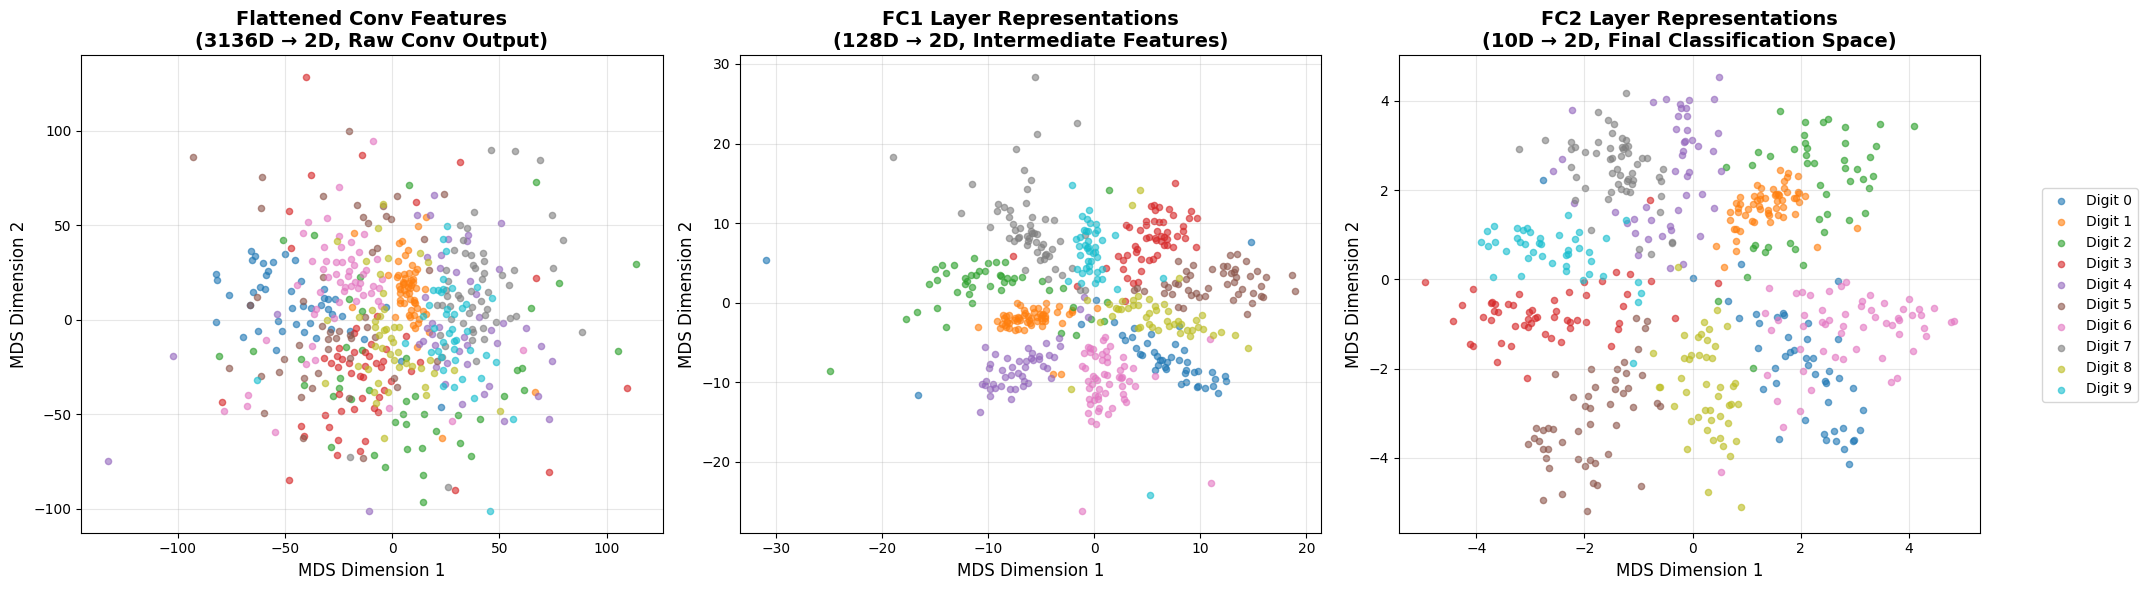

Flattened MDS stress: 70995620.350
FC1 MDS stress: 2688219.782
FC2 MDS stress: 143564.405

Progressive Representation Learning:
• Flattened: Raw conv features (3136D) - initial clustering
• FC1: Compressed features (128D) - refined clustering
• FC2: Final logits (10D) - classification space
• Notice how digit separation improves left → right


In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# Standardize and apply MDS to all three representations
scaler_flat = StandardScaler()
flat_scaled = scaler_flat.fit_transform(representations['flattened'])
mds_flat = MDS(n_components=2, random_state=42, normalized_stress='auto')
flat_2d = mds_flat.fit_transform(flat_scaled)

scaler_fc1 = StandardScaler()
fc1_scaled = scaler_fc1.fit_transform(representations['fc1'])
mds_fc1 = MDS(n_components=2, random_state=42, normalized_stress='auto')
fc1_2d = mds_fc1.fit_transform(fc1_scaled)

scaler_fc2 = StandardScaler()
fc2_scaled = scaler_fc2.fit_transform(representations['fc2'])
mds_fc2 = MDS(n_components=2, random_state=42, normalized_stress='auto')
fc2_2d = mds_fc2.fit_transform(fc2_scaled)

# Create three-panel visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
colors = plt.cm.tab10(np.arange(10))

# Flattened conv representations
for digit in range(10):
    mask = sample_labels == digit
    if np.any(mask):
        ax1.scatter(flat_2d[mask, 0], flat_2d[mask, 1], 
                   c=[colors[digit]], s=20, alpha=0.6, 
                   label=f'Digit {digit}')

ax1.set_xlabel('MDS Dimension 1', fontsize=12)
ax1.set_ylabel('MDS Dimension 2', fontsize=12)
ax1.set_title('Flattened Conv Features\n(3136D → 2D, Raw Conv Output)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# FC1 representations
for digit in range(10):
    mask = sample_labels == digit
    if np.any(mask):
        ax2.scatter(fc1_2d[mask, 0], fc1_2d[mask, 1], 
                   c=[colors[digit]], s=20, alpha=0.6, 
                   label=f'Digit {digit}')

ax2.set_xlabel('MDS Dimension 1', fontsize=12)
ax2.set_ylabel('MDS Dimension 2', fontsize=12)
ax2.set_title('FC1 Layer Representations\n(128D → 2D, Intermediate Features)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# FC2 representations (pre-softmax logits)
for digit in range(10):
    mask = sample_labels == digit
    if np.any(mask):
        ax3.scatter(fc2_2d[mask, 0], fc2_2d[mask, 1], 
                   c=[colors[digit]], s=20, alpha=0.6, 
                   label=f'Digit {digit}')

ax3.set_xlabel('MDS Dimension 1', fontsize=12)
ax3.set_ylabel('MDS Dimension 2', fontsize=12)
ax3.set_title('FC2 Layer Representations\n(10D → 2D, Final Classification Space)', 
              fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Single legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()

This MDS visualization shows how the CNN progressively separates different digits:

**Left (Flattened Conv Features)**: After convolutional layers, we don't see clear digit clustering yet - the features are still quite mixed.

**Middle (FC1 Layer)**: After just one linear layer, the model groups digits together much more effectively with distinct clusters emerging.

**Right (FC2 Layer)**: The final layer creates even tighter, well-separated clusters in the 10-dimensional classification space.

This demonstrates how deep networks automatically discover increasingly refined representations that make classification easier at each layer.

---
<br><br>
# Let's transfer our knowledge now to real-world datasets!

Now that we've built a solid foundation with neural networks and CNNs using the MNIST dataset, it's time to apply these powerful tools to real-world medical problems. 

We'll explore three different applications that showcase the versatility of deep learning in healthcare:

1. **Regression Task**: Predicting continuous medical outcomes using patient data
2. **Classification without Images**: Diagnosing conditions using structured clinical data  
3. **Classification with Images**: Analyzing medical imaging data using CNNs

These examples will demonstrate how the same fundamental concepts we've learned - from basic neural networks to convolutional architectures - can be adapted to solve diverse medical challenges, from predicting patient outcomes to interpreting medical scans.

Let's see deep learning in action for healthcare!

## First Challenge: Regression task

dataset

# Pretrained networks

Often we can build upon already trained networks and improve them for our usecases. -> explain how, where to find them certain applications etc.